In [1]:
%pip install yfinance
%pip install bs4
%pip install nbformat


[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [5]:
tesla=yf.Ticker("TSLA")

In [6]:
tesla_data=tesla.history(period="max")

In [7]:
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-27 00:00:00-05:00,449.519989,450.000000,426.500000,431.660004,82666800,0.0,0.0
2024-12-30 00:00:00-05:00,419.399994,427.000000,415.750000,417.410004,64941000,0.0,0.0
2024-12-31 00:00:00-05:00,423.790009,427.929993,402.540009,403.839996,76825100,0.0,0.0


In [8]:
tesla_data.reset_index(inplace=True)

In [9]:
tesla_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...,...
3649,2024-12-27 00:00:00-05:00,449.519989,450.000000,426.500000,431.660004,82666800,0.0,0.0
3650,2024-12-30 00:00:00-05:00,419.399994,427.000000,415.750000,417.410004,64941000,0.0,0.0
3651,2024-12-31 00:00:00-05:00,423.790009,427.929993,402.540009,403.839996,76825100,0.0,0.0
3652,2025-01-02 00:00:00-05:00,390.100006,392.730011,373.040009,379.279999,109710700,0.0,0.0


In [10]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [11]:
html_data=requests.get( "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm")

In [12]:
data=html_data.text

In [13]:
soup=BeautifulSoup(data,"html.parser")

In [14]:
soup.find_all("tr")

[<tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>,
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>,
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>,
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>,
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>,
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>,
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$7,000</td>
 </tr>,
 <tr>
 <td style="text-align:center">2015</td>
 <td style="text-align:center">$4,046</td>
 </tr>,
 <tr>
 <td style="text-align:center">2014</td>
 <td style="text-align:center">$3,198</td>
 </tr>,
 <tr>
 <td style="text-align:center">2013</td>
 <td style="text-alig

In [15]:
tesla_revenue=pd.DataFrame(columns=["Date","Revenue"])

In [16]:
rows=soup.find_all("tbody")[1].find_all("tr")

In [17]:
rows

[<tr>
 <td style="text-align:center">2022-09-30</td>
 <td style="text-align:center">$21,454</td>
 </tr>,
 <tr>
 <td style="text-align:center">2022-06-30</td>
 <td style="text-align:center">$16,934</td>
 </tr>,
 <tr>
 <td style="text-align:center">2022-03-31</td>
 <td style="text-align:center">$18,756</td>
 </tr>,
 <tr>
 <td style="text-align:center">2021-12-31</td>
 <td style="text-align:center">$17,719</td>
 </tr>,
 <tr>
 <td style="text-align:center">2021-09-30</td>
 <td style="text-align:center">$13,757</td>
 </tr>,
 <tr>
 <td style="text-align:center">2021-06-30</td>
 <td style="text-align:center">$11,958</td>
 </tr>,
 <tr>
 <td style="text-align:center">2021-03-31</td>
 <td style="text-align:center">$10,389</td>
 </tr>,
 <tr>
 <td style="text-align:center">2020-12-31</td>
 <td style="text-align:center">$10,744</td>
 </tr>,
 <tr>
 <td style="text-align:center">2020-09-30</td>
 <td style="text-align:center">$8,771</td>
 </tr>,
 <tr>
 <td style="text-align:center">2020-06-30</td>
 <t

In [18]:
for row in rows:
    col=row.find_all("td")
    date=col[0].text
    revenue=col[1].text
    tesla_revenue=pd.concat([tesla_revenue,pd.DataFrame({"Date":[date],"Revenue":[revenue]})],ignore_index=True)

In [19]:
tesla_revenue

,Date,Revenue
0,2022-09-30,"$21,454"
1,2022-06-30,"$16,934"
2,2022-03-31,"$18,756"
3,2021-12-31,"$17,719"
4,2021-09-30,"$13,757"
5,2021-06-30,"$11,958"
6,2021-03-31,"$10,389"
7,2020-12-31,"$10,744"
8,2020-09-30,"$8,771"
9,2020-06-30,"$6,036"


In [20]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('[,|\$]',"",regex=True)

In [21]:
tesla_revenue

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


In [22]:
tesla_revenue.dropna(inplace=True)

In [23]:
tesla_revenue

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


In [24]:
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [25]:
tesla_revenue

,Date,Revenue
0,2022-09-30,21454
1,2022-06-30,16934
2,2022-03-31,18756
3,2021-12-31,17719
4,2021-09-30,13757
5,2021-06-30,11958
6,2021-03-31,10389
7,2020-12-31,10744
8,2020-09-30,8771
9,2020-06-30,6036


In [26]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [27]:
gamestop=yf.Ticker("GME")

In [28]:
gme_data=gamestop.history(period="max")
gme_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-27 00:00:00-05:00,32.389999,33.049999,30.730000,32.200001,10141700,0.0,0.0
2024-12-30 00:00:00-05:00,31.799999,32.880001,31.610001,32.009998,9593100,0.0,0.0
2024-12-31 00:00:00-05:00,32.060001,32.439999,31.100000,31.340000,7395300,0.0,0.0


In [29]:
gme_data.reset_index(inplace=True)

In [30]:
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662209,1.603296,1.662209,6892800,0.0,0.0


In [31]:
html_data_2=requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html").text

In [32]:
soup1=BeautifulSoup(html_data_2,"html.parser")

In [33]:
soup1.find_all("table")

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">GameStop Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$6,466</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$8,285</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$8,547</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$7,965</td>
 </tr>
 <tr>
 <td style="text-align:center">2016</td>
 <td style="text-align:center">$9,364</td>
 </tr>
 <tr>
 <td style="text-align:center">2015</td>
 <td style="text-align:center">$9,296</td>
 </tr>
 <tr>
 <td style="text-align:center">2014</td>
 <td style="text-align:center">$9,040</td>
 </tr>
 <tr>
 <td style="text-align:center">2013</td>
 <td style="text-align:center">$8,887</td>
 </tr>
 <tr>


In [34]:
rows1=soup1.find_all("tbody")[1].find_all("tr")

In [35]:
gamestop_revenue=pd.DataFrame(columns=["Date","Revenue"])

In [36]:
for row1 in rows1:
    col1=row1.find_all("td")
    date1=col1[0].text
    revenue1=col1[1].text
    gamestop_revenue=pd.concat([gamestop_revenue,pd.DataFrame({"Date":[date1],"Revenue":[revenue1]})],ignore_index=True)

In [37]:
gamestop_revenue

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"
...,...,...
57,2006-01-31,"$1,667"
58,2005-10-31,$534
59,2005-07-31,$416
60,2005-04-30,$475


In [38]:
gamestop_revenue["Revenue"]=gamestop_revenue["Revenue"].str.replace(',|\$',"",regex=True)

In [39]:
gamestop_revenue.dropna(inplace=True)

In [40]:
gamestop_revenue = gamestop_revenue[gamestop_revenue['Revenue'] != ""]

In [41]:
gamestop_revenue

,Date,Revenue
0,2020-04-30,1021
1,2020-01-31,2194
2,2019-10-31,1439
3,2019-07-31,1286
4,2019-04-30,1548
...,...,...
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475


In [42]:
gamestop_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [43]:
make_graph(tesla_data,tesla_revenue,"Tesla")

/var/folders/nn/1k4ph2995ylfc8r0v3_pftj80000gn/T/ipykernel_62670/3316612210.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/var/folders/nn/1k4ph2995ylfc8r0v3_pftj80000gn/T/ipykernel_62670/3316612210.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



/tmp/ipykernel_1905/3316612210.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

/tmp/ipykernel_1905/3316612210.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



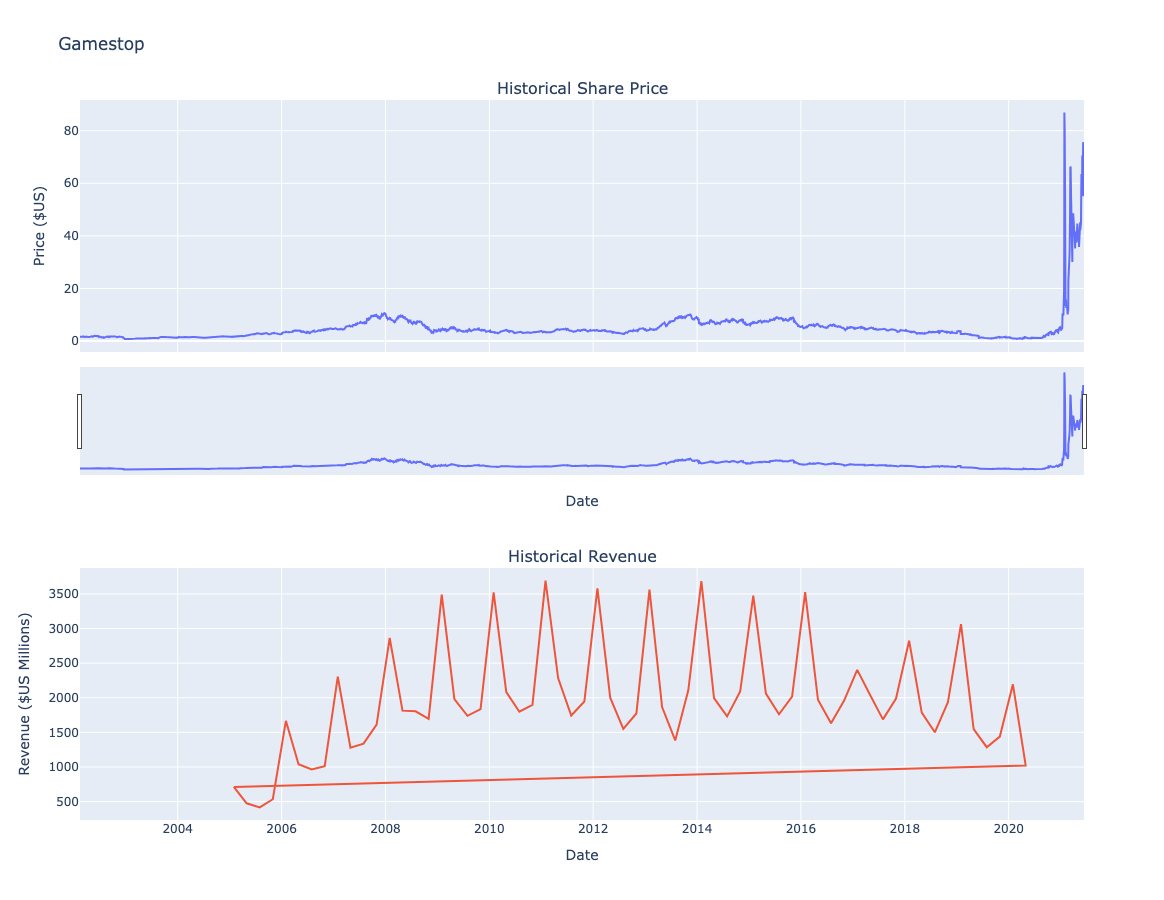

In [160]:
make_graph(gme_data,gamestop_revenue,"Gamestop")